# Estudio de Mercado a restaurantes de LA

## Análisis a realizar
- Investiga las proporciones de los distintos tipos de establecimientos. Traza un gráfico.
- Investiga las proporciones de los establecimientos que pertenecen a una cadena y de los que no. Traza un gráfico.
- ¿Qué tipo de establecimiento es habitualmente una cadena?
- ¿Qué caracteriza a las cadenas: muchos establecimientos con un pequeño número de asientos o unos pocos establecimientos con un montón de asientos?
- Determina el promedio de número de asientos para cada tipo de restaurante. De promedio, ¿qué tipo de restaurante tiene el mayor número de asientos? Traza gráficos.
- Coloca los datos de los nombres de las calles de la columna `address` en una columna separada.
- Traza un gráfico de las diez mejores calles por número de restaurantes.
- Encuentra el número de calles que solo tienen un restaurante.
- Para las calles con muchos restaurantes, analiza la distribución del número de asientos. ¿Qué tendencias puedes ver?

Llega a una conclusión y aporta recomendaciones sobre el tipo de restaurante y el número de asientos. Comenta la posibilidad de desarrollar una cadena.

# Importación de librerías 

In [41]:
import pandas as pd 
import numpy as np 
import math 
import seaborn as sns 
import plotly.express as px 
from plotly import graph_objects as go 
from scipy import stats as st 
import matplotlib.pyplot as plt 

# Importar Dataset

In [42]:
restaurants = pd.read_csv('rest_data_us.csv', dtype=({'object_type':'category', 'chain':'category'}))

## Descripción de datos 
Tabla `restaurants`:

- *object_name* — nombre del establecimiento
- *chain* — establecimiento que pertenece a una cadena (TRUE/FALSE)
- *object_type* — tipo de establecimiento
- *address* — dirección
- *number* — número de asientos

# Preprocesamiento de Datos 

## Información General del dataset

In [43]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           9651 non-null   int64   
 1   object_name  9651 non-null   object  
 2   address      9651 non-null   object  
 3   chain        9648 non-null   category
 4   object_type  9651 non-null   category
 5   number       9651 non-null   int64   
dtypes: category(2), int64(2), object(2)
memory usage: 320.8+ KB


In [44]:
restaurants.rename(columns=({'object_name':'rest_name','object_type':'rest_type'}), inplace=True)

In [45]:
restaurants

,id,rest_name,address,chain,rest_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6


##  Verificación de valores duplicados 

In [46]:
restaurants.duplicated().sum()

0

# Análisis de datos 

## Investiga las proporciones de los distintos tipos de establecimientos. Traza un gráfico.

In [47]:
# Calcular las proporciones de los distintos tipos de establecimientos
rest_counts = restaurants['rest_type'].value_counts()

# Crear el gráfico
fig = px.pie(names=rest_counts.index, values=rest_counts.values, title='Proporciones de Tipos de Establecimientos')

# Ajustar el tamaño de la figura
fig.update_layout(width=600, height=400)

# Mostrar el gráfico
fig.show()

Dominio de restaurantes: El tipo de establecimiento más común es el restaurante, con un total de 7255 casos. Esto sugiere que los restaurantes son el tipo de negocio de alimentos más predominante en la muestra de datos.

Presencia significativa de comidas rápidas: Después de los restaurantes, las comidas rápidas (Fast Food) son el segundo tipo de establecimiento más común, con 1066 casos. Esto indica que las opciones de comida rápida también son populares y ampliamente disponibles en la zona cubierta por los datos.

Cafés y panaderías: Los cafés y las panaderías tienen una presencia considerable, con 435 y 283 casos respectivamente. Esto sugiere una demanda constante de opciones de café y productos horneados en la zona.

Presencia moderada de pizzerías y bares: Las pizzerías y los bares también están presentes, aunque en menor medida en comparación con los restaurantes, las comidas rápidas, los cafés y las panaderías. Esto indica una variedad en la oferta gastronómica, incluyendo opciones para aquellos que buscan pizza o un lugar para beber.

En resumen, las tendencias muestran una preferencia general por los restaurantes, seguida de cerca por las opciones de comida rápida, cafés y panaderías, con una presencia moderada de pizzerías y bares. Esto sugiere una diversidad en la oferta gastronómica, con opciones para una variedad de gustos y preferencias de los clientes.







## Investiga las proporciones de los establecimientos que pertenecen a una cadena y de los que no. Traza un gráfico.

Para realizar este análisis se filtrará el dataset original con los establecimientos que pertenecen a una cadena y los que no

In [48]:
# Filtar df original con los estableciminetos pertenecientes a una cadena
chain_rest = restaurants[restaurants['chain']=='True']
# Filtar df original con los establecimientos que no pertenecen a una cadena 
not_chain = restaurants[restaurants['chain']=='False']

In [49]:
# Crear gráfico circular para la proporción de establecimientos pertenecientes a una cadena 
fig = px.pie(names=rest_counts.index, values=chain_rest['rest_type'].value_counts(), title='Proporción de establecimientos que son de una cadena')
# Ajustar el tamaño de la figura
fig.update_layout(width=500, height=400)
# Mostrar el gráfico
fig.show()

# Crear gráfico circular para la proporción de estableciminetos no pertenecientes a una cadena
fig = px.pie(names=rest_counts.index, values=not_chain['rest_type'].value_counts(),color_discrete_sequence=px.colors.sequential.RdBu, title='Proporción de establecimientos que no están en una cadena')
# Ajustar el tamaño de la figura
fig.update_layout(width=600, height=400)
# Mostrar el gráfico
fig.show()

### ¿Qué tipo de establecimiento es habitualmente una cadena?

Basándonos en la información proporcionada sobre la cantidad de restaurantes según el tipo que pertenecen a una cadena y los que no, podemos observar las siguientes tendencias:

Para los restaurantes que pertenecen a una cadena:

El tipo de establecimiento más común es el "Restaurante", con 2292 casos.
Le siguen las "Comidas rápidas" (Fast Food) con 605 casos.

Para los restaurantes que no pertenecen a una cadena:

Nuevamente, el tipo de establecimiento más común es el "Restaurante", con 4961 casos.
Le siguen "Comidas rápidas" (Fast Food) con 461 casos.
A partir de estos datos, podemos ver que tanto para los restaurantes que pertenecen a una cadena como para los que no, el tipo de establecimiento más común es el "Restaurante". Sin embargo, también observamos una presencia significativa de "Comidas rápidas" (Fast Food) en ambos grupos.

Por lo tanto, podemos concluir que los tipos de establecimiento más habituales para una cadena son los "Restaurantes" y las "Comidas rápidas" (Fast Food). Estos tipos de establecimiento parecen ser los más propensos a formar parte de una cadena debido a su naturaleza de negocio y la facilidad de estandarización y replicación.

## ¿Qué caracteriza a las cadenas: muchos establecimientos con un pequeño número de asientos o unos pocos establecimientos con un montón de asientos? 
Para este análisis necesitaremos herramientas estadísticas como la media, mediana, percentiles 90, 95 y 99, así como visualizar la distribución del número de asientos a través de histogramas o gráficos de dispersión. De esta manera podremos establecer los umbrales para determinar si un establecimiento tiene pocos o muchos asientos y así contestar la pregunta.

In [50]:
# Obtener un resumen de estadísticas descriptivas de la cantidad de asientos en los estableciminetos usando .describe()
chain_rest['number'].describe()

count    3676.000000
mean       39.694233
std        43.437212
min         1.000000
25%        13.000000
50%        25.000000
75%        44.000000
max       229.000000
Name: number, dtype: float64

In [51]:
# Calcular los percentiles 90, 95 y 99 para identificar valores atípicos 
print(np.percentile(chain_rest['number'], [90,95,99]))

[107.   140.   206.25]


Text(0, 0.5, 'Número de asientos')

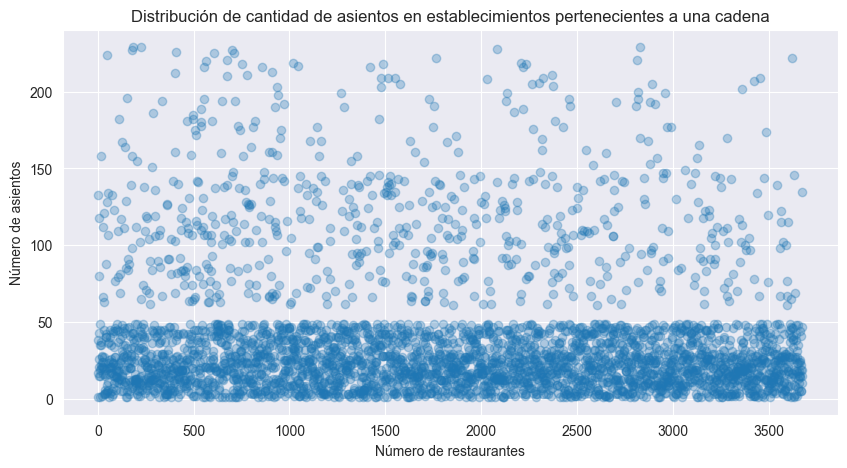

In [52]:

plt.figure(figsize=(10,5))

plt.scatter(pd.Series(range(0,len(chain_rest['number']))), chain_rest['number'], alpha=0.3)
plt.title('Distribución de cantidad de asientos en establecimientos pertenecientes a una cadena')
plt.xlabel('Número de restaurantes')
plt.ylabel('Número de asientos')


Con los resultados obtenidos llegamos a la decisión de tomar a aquellos restaurante con 40 o menos asientos como establecimientos de pocos asientos ya que esta es la media de asientos y cualquier número debajo de ella se puede tomar como pequeño y a aquellos con 110 o más asientos como estableciminetos con muchos asientos. Una vez hecha la decisión se filtra el dataset con los establecimientos pertenecientes a cadenas usando los parámetros mencionados

In [53]:
# Filtrar los establecimientos con pocos asientos 
few_seats_chain = len(chain_rest[chain_rest['number']<= 40])
# Filtrar los establecimientos con muchos asientos
many_seats_chain = len(chain_rest[chain_rest['number']>=110])
# Mostrar la cantidad de restaurantes con pocos y muchos asientos
print(f'Establecimientos con pocos asientos: {few_seats_chain} y establecimientos con muchos asientos: {many_seats_chain}')

Establecimientos con pocos asientos: 2586 y establecimientos con muchos asientos: 349


Podemos inferir que lo que caracteriza a las cadenas es que tienen muchos establecimientos con un pequeño número de asientos en comparación con aquellos con un montón de asientos. Esto se deduce del hecho de que la cantidad de establecimientos con pocos asientos (2586) es significativamente mayor que la cantidad de establecimientos con muchos asientos (349).

Por lo tanto, podemos concluir que las cadenas tienden a tener muchos establecimientos con un pequeño número de asientos, lo que sugiere que la estrategia de las cadenas puede estar orientada hacia la creación de establecimientos más pequeños y manejables, quizás para facilitar la operación, controlar los costos y adaptarse a una variedad de ubicaciones y demandas del mercado.

## Determina el promedio de número de asientos para cada tipo de restaurante. De promedio, ¿qué tipo de restaurante tiene el mayor número de asientos?

In [54]:
# Agrupar el df original por el tipo de establecimiento y sacar el promedio de número de asientos 
mean_seats = restaurants.groupby('rest_type', as_index=False).agg({'number':'mean'}).sort_values(by='number', ascending=False)
# Mostrar el resultado
mean_seats

C:\Users\User\AppData\Local\Temp\ipykernel_12512\2392314124.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,rest_type,number
5,Restaurant,48.042316
1,Bar,44.767123
3,Fast Food,31.837711
4,Pizza,28.459375
2,Cafe,25.000000
0,Bakery,21.773852


C:\Users\User\AppData\Local\Temp\ipykernel_12512\867960139.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need

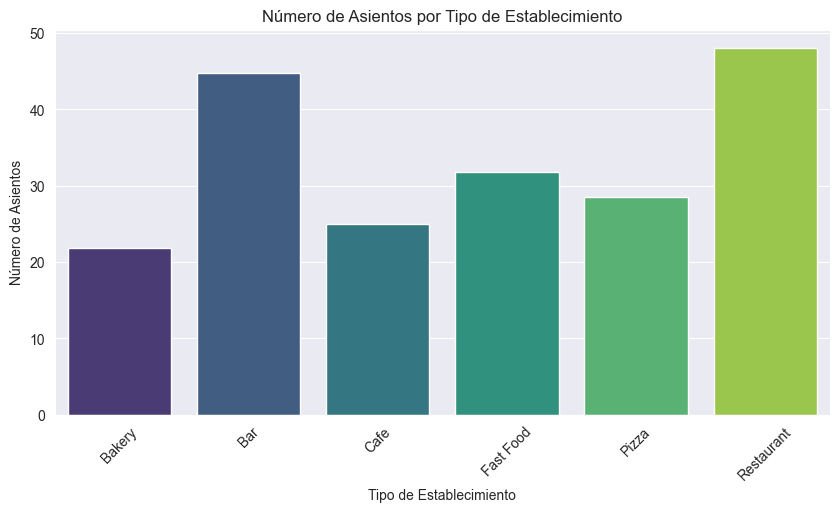

In [55]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x='rest_type', y='number', data=mean_seats, palette='viridis')
plt.xlabel('Tipo de Establecimiento')
plt.ylabel('Número de Asientos')
plt.title('Número de Asientos por Tipo de Establecimiento')
plt.xticks(rotation=45)
plt.show()

+ Restaurantes: Tienen el mayor promedio de asientos con aproximadamente 48.04 asientos.
+ Bares: Tienen el segundo mayor promedio de asientos con aproximadamente 44.77 asientos.
+ Comidas Rápidas (Fast Food): Tienen un promedio de alrededor de 31.84 asientos.
+ Pizzerías: Tienen un promedio de alrededor de 28.46 asientos.
+ Cafeterías: Tienen el menor promedio de asientos con 25.00 asientos.
+ Panaderías: Tienen el promedio más bajo de asientos con aproximadamente 21.77 asientos.

Por lo tanto, podemos concluir que, en promedio, el tipo de restaurante que tiene el mayor número de asientos es el Restaurante.

## Colocar los nombres de las calles de la columna 'address' en una columna separada

In [56]:
# Crear columnas referente al número y nombre de la calle separando la dirección original 
restaurants[['street_number', 'street_name']] = restaurants['address'].str.split(n=1, expand=True)

## Gráfico de las 10 mejores calles por número de restaurantes

In [57]:
top_streets = restaurants['street_name'].value_counts()
top_10_streets = top_streets.head(10)
top_10_streets

street_name
W SUNSET BLVD        296
W PICO BLVD          288
HOLLYWOOD BLVD       167
WILSHIRE BLVD        161
S VERMONT AVE        148
SANTA MONICA BLVD    146
W 3RD ST             145
BEVERLY BLVD         135
S FIGUEROA ST        134
S WESTERN AVE        128
Name: count, dtype: int64

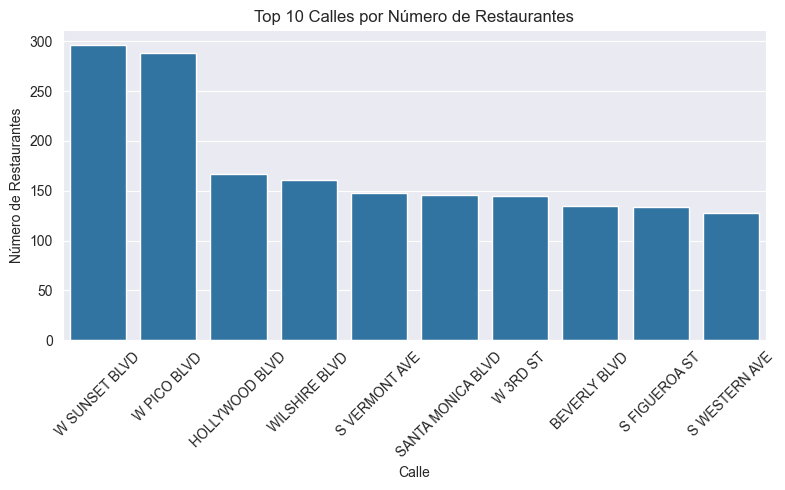

In [58]:

# Establecer el estilo darkgrid de Seaborn
sns.set_style("darkgrid")

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=top_10_streets.index, y=top_10_streets)
plt.title('Top 10 Calles por Número de Restaurantes')
plt.xlabel('Calle')
plt.ylabel('Número de Restaurantes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Con base en la tabla que muestra las 10 calles más populares en Los Ángeles en términos de la cantidad de restaurantes, podemos hacer varias observaciones y consideraciones para el negocio:

Competencia: Las calles enumeradas son áreas con una alta densidad de restaurantes. Esto indica una fuerte competencia en estas ubicaciones. Como propietario de un café, se debe estar preparado para destacar entre la competencia y ofrecer algo único para atraer clientes.

Demanda de comida y bebida: La presencia de numerosos restaurantes sugiere una demanda continua de comida y bebida en estas áreas. Esto es positivo para tu negocio de café, ya que existe un mercado establecido de consumidores de alimentos y bebidas que podrían estar interesados en tu oferta.

Diversidad de público: Las calles populares como Sunset Boulevard, Pico Boulevard y Hollywood Boulevard son áreas con una alta afluencia de personas de diversas áreas y culturas. Esto puede ser beneficioso para el negocio, ya existe la oportunidad de atraer a una amplia gama de clientes y adaptarte a diferentes gustos y preferencias.

Ubicación estratégica: Algunas de las calles listadas, como Wilshire Boulevard y Santa Monica Boulevard, son conocidas por su ubicación estratégica y su acceso fácil a áreas comerciales y turísticas. Considerar la ubicación del café en relación con estas áreas para aprovechar al máximo el tráfico de personas.

Innovación tecnológica: Al abrir un café regentado por robots, el negocio tiene el potencial de destacar entre la competencia al ofrecer una experiencia única y tecnológicamente avanzada. Es importante comunicar claramente esta propuesta de valor única a los inversionistas para demostrar el potencial de tu negocio en un mercado competitivo.

En resumen, aunque el mercado de restaurantes en las áreas más populares de Los Ángeles es competitivo, el negocio de café regentado por robots tiene la oportunidad de destacar mediante la oferta de una experiencia innovadora y única para los clientes. Se tiene que considerar la ubicación estratégica, la competencia y la demanda del mercado al planificar la apertura del café en una de estas calles populares.

## Número de calles con solo un restaurante

In [59]:
one_rest_street = len(top_streets[top_streets==1])
one_rest_street

2450

Conociendo que existen 2450 calles que solamente tienen un restaurante, podemos hacer las siguientes conclusiones y consideraciones para el negocio de café regentado por robots:

Menos competencia directa: Las calles con solo un restaurante representan áreas menos saturadas en términos de oferta de comida y bebida. Esto puede ser una oportunidad para el negocio, ya que habrá menos competencia directa en estas ubicaciones.

Potencial de nicho: Las calles con un solo restaurante pueden representar nichos de mercado donde la demanda de alimentos y bebidas puede no estar completamente satisfecha. El café regentado por robots podría llenar este vacío ofreciendo una opción única y diferente en estas áreas.

Investigación de mercado: Antes de elegir la ubicación del café, es importante realizar una investigación de mercado exhaustiva en estas calles con un solo restaurante. 

Marketing y promoción: Al abrir el café en una calle con un solo restaurante, es crucial implementar estrategias efectivas de marketing y promoción para atraer clientes y crear conciencia sobre tu negocio. Considerar el uso de las redes sociales, la publicidad local, las degustaciones y otras tácticas para generar interés en el café.

Diversificación de productos y servicios: Para tener éxito en un entorno con menos competencia directa, se tendría que considerar diversificar la oferta de productos y servicios. Además de café y bebidas, se podría ofrecer opciones de comida rápida saludable, bocadillos o productos exclusivos que puedan diferenciarnos de otros establecimientos en la calle.

## Para las calles con muchos restaurantes, analiza la distribución del número de asientos. ¿Qué tendencias puedes ver?

In [60]:
seats_dist = restaurants[restaurants['street_name'].isin(top_10_streets.index)]
seats_dist['number'].describe()

count    1748.000000
mean       46.952517
std        47.919599
min         1.000000
25%        16.000000
50%        31.000000
75%        48.000000
max       229.000000
Name: number, dtype: float64

Text(0, 0.5, 'Número de asientos')

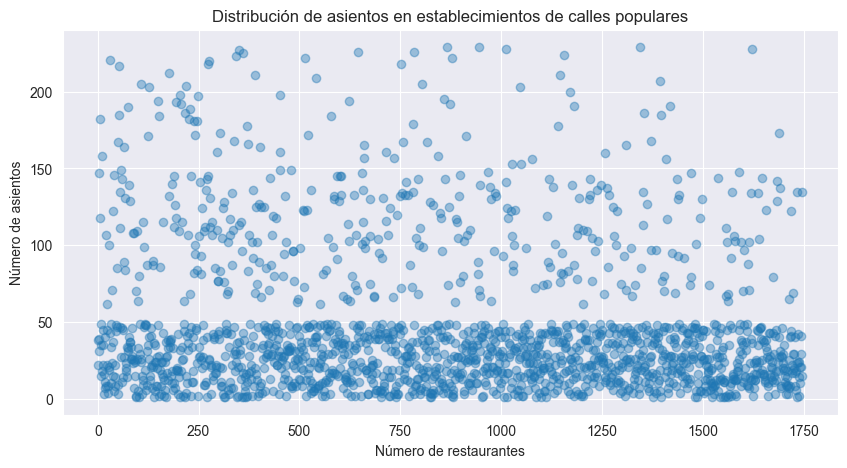

In [61]:

plt.figure(figsize=(10,5))

plt.scatter(pd.Series(range(0,len(seats_dist['number']))), seats_dist['number'], alpha=0.4)
plt.title('Distribución de asientos en establecimientos de calles populares')
plt.xlabel('Número de restaurantes')
plt.ylabel('Número de asientos')

Basándonos en el resumen de estadísticas descriptivas del número de asientos de los restaurantes ubicados en las calles más populares (aquellas con muchos restaurantes), podemos identificar varias tendencias:

Distribución sesgada hacia la derecha: La media (46.95) es mayor que la mediana (31.00), lo que sugiere una distribución sesgada hacia la derecha en la cantidad de asientos. Esto significa que hay algunos restaurantes en estas calles con un número considerablemente alto de asientos, lo que aumenta el promedio.

Rango amplio: El rango de asientos va desde 1 hasta 229. Esto indica una gran variabilidad en el número de asientos entre los restaurantes ubicados en estas calles populares.

75% de los restaurantes tienen menos de 48 asientos: El tercer cuartil (75%) se encuentra en 48 asientos, lo que sugiere que la mayoría de los restaurantes en estas calles tienen menos de 48 asientos.

Desviación estándar significativa: La desviación estándar (47.92) es bastante alta en comparación con la media y la mediana. Esto indica una gran dispersión de los datos alrededor de la media, lo que sugiere una variabilidad considerable en el número de asientos entre los restaurantes.

En resumen, las calles con muchos restaurantes muestran una amplia variabilidad en el número de asientos de los restaurantes, con algunos establecimientos que tienen un gran número de asientos, lo que aumenta el promedio. Sin embargo, la mayoría de los restaurantes en estas calles tienen menos de 48 asientos, lo que sugiere que hay una diversidad de tamaños de establecimientos en estas áreas.

### Comparación con la distribución de asientos en las cadenas

Estadísticas para los restaurantes pertenecientes a cadenas:

Count: 3676

Mean: 39.69

Std: 43.44

Min: 1

25%: 13

50%: 25

75%: 44

Max: 229

Estadísticas para los restaurantes en las calles más populares:

Count: 1748

Mean: 46.95

Std: 47.92

Min: 1

25%: 16

50%: 31

75%: 48

Max: 229

Ahora, comparando las dos:

Media y mediana: La media y la mediana para los restaurantes en las calles más populares (46.95 y 31, respectivamente) son más altas que para los restaurantes pertenecientes a cadenas (39.69 y 25, respectivamente). Esto indica que, en promedio, los restaurantes en las calles más populares tienen un número de asientos más alto que los restaurantes pertenecientes a cadenas.

Desviación estándar: La desviación estándar para los restaurantes en las calles más populares (47.92) es ligeramente más alta que para los restaurantes pertenecientes a cadenas (43.44). Esto sugiere que la variabilidad en el número de asientos es un poco mayor entre los restaurantes en las calles más populares.

En resumen, los restaurantes en las calles más populares tienden a tener un número de asientos promedio más alto en comparación con los restaurantes pertenecientes a cadenas. Además, la variabilidad en el número de asientos también puede ser un poco mayor en los restaurantes de las calles más populares.

# Conclusión General 

Después de analizar los datos proporcionados y considerar los resultados presentados hasta el momento, podemos llegar a varias conclusiones y recomendaciones sobre el tipo de restaurante y el número de asientos, así como sobre la posibilidad de desarrollar una cadena:

Tipo de restaurante:

Basándonos en los datos, los restaurantes de tipo "Restaurant" y "Bar" parecen ser los más populares y tienen un mayor promedio de asientos en comparación con otros tipos de establecimientos como cafeterías y panaderías.
Si estás considerando abrir un nuevo restaurante, podrías optar por un concepto de restaurante o bar que se ajuste a las preferencias y demanda del mercado local en áreas con alta densidad de restaurantes.
Número de asientos:

Los restaurantes en las calles más populares tienden a tener un número de asientos promedio más alto en comparación con los restaurantes pertenecientes a cadenas. Esto sugiere que los establecimientos en áreas con alta competencia pueden necesitar ofrecer más asientos para atraer y retener clientes.
Sin embargo, es importante tener en cuenta que la distribución del número de asientos puede variar considerablemente, y es esencial comprender las preferencias y necesidades del público objetivo al determinar la capacidad de asientos adecuada para tu establecimiento.
Posibilidad de desarrollar una cadena:

La presencia de numerosas calles con múltiples restaurantes indica un mercado dinámico y competitivo. Si estás considerando desarrollar una cadena de restaurantes, es crucial identificar áreas estratégicas con una alta demanda y competencia moderada para maximizar el potencial de crecimiento y éxito de la cadena.
Además, ofrecer un concepto de restaurante único y diferenciado, junto con una excelente calidad de servicio y productos, puede ayudar a destacar tu cadena en un mercado saturado y atraer a una base de clientes leal y creciente.

# Presentación
Presentation: <https://github.com/BCascante/Estudio-de-Mercado>